In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Mon May  6 00:51:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


**Importing the necessary libraries**

In [4]:
pip install astroNN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 55.5 MB/s eta 0:00:00


In [5]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.5 MB/s eta 0:00:00


In [6]:
pip install tensorflow

In [7]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [8]:
!pip install keras==2.15.0

In [9]:
import pandas as pd
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import streamlit as st
import tensorflow as tf
from tensorflow import keras
from keras import utils
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.utils import to_categorical #ask Converts a class vector (integers) to binary class matrix.
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterSampler # it will allow to create random variations in the model
#building neural network
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Conv2D, MaxPooling2D

from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
import itertools
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout


In [10]:
print('tensorflow version: ',tf.__version__)
print('streamlit version: ',st.__version__)
print('numpy version: ',np.__version__)

tensorflow version:  2.15.0
streamlit version:  1.34.0
numpy version:  1.25.2


# Data Loading
**Loading the images and labels from dataset file h5 that contains multidimensional arrays**

In [15]:
if not os.path.isfile('/content/drive/MyDrive/Galactic_Scholors/Galaxy10_DECals.h5'):
    url = 'https://astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5'
    print("ERROR: download dataset from: ", url)
if os.path.isdir('Galaxy10'):
    import shutil
    shutil.rmtree('Galaxy10')

In [16]:
with h5py.File('/content/drive/MyDrive/Galactic_Scholors/Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])
    ra = np.array(F['ra'])
    dec = np.array(F['dec'])
    z = np.array(F['redshift'])

print('Data loaded successfully')

#Galaxy10 dataset (17736 images)
#├── Class 0 (1081 images): Disturbed_Galaxies
#├── Class 1 (1853 images): Merging_Galaxies
#├── Class 2 (2645 images): Round_Smooth_Galaxies
#├── Class 3 (2027 images): In-between_Round_Smooth_Galaxies
#├── Class 4 ( 334 images): Cigar_Shaped_Smooth_Galaxies
#├── Class 5 (2043 images): Barred_Spiral_Galaxies
#├── Class 6 (1829 images): Unbarred_Tight_Spiral_Galaxies
#├── Class 7 (2628 images): Unbarred_Loose_Spiral_Galaxies
#├── Class 8 (1423 images): Edge-on_Galaxies_without_Bulge
#└── Class 9 (1873 images): Edge-on_Galaxies_with_Bulge

class_names = ['Disturbed', 'Merging', 'Round_Smooth',
               'In-between_Round_Smooth', 'Cigar_Shaped_Smooth', 'Barred_Spiral',
               'Unbarred_Tight_Spiral', 'Unbarred_Loose_Spiral', 'Edge-on_without_Bulge',
               'Edge-on_with_Bulge']

Data loaded successfully


In [17]:
print('Images shape:',images.shape)

Images shape: (17736, 256, 256, 3)


In [18]:
print('labels:', labels)

labels: [0 0 0 ... 9 9 9]


In [19]:
# Convert labels into 10 categorical classes
labels_cat = utils.to_categorical(labels, 10)
print('Categorical label:', labels_cat[0])
print('Shape of data structure labels {} and images {}'.format(labels_cat.shape, images.shape))

Categorical label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of data structure labels (17736, 10) and images (17736, 256, 256, 3)


In [20]:
# Number of galaxies per class
print('Dataset images per class:', np.sum(labels_cat, axis=0))

Dataset images per class: [1081. 1853. 2645. 2027.  334. 2043. 1829. 2628. 1423. 1873.]


<ipython-input-21-477ef4bddc32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.argmax(labels_cat, axis=1), palette='viridis')


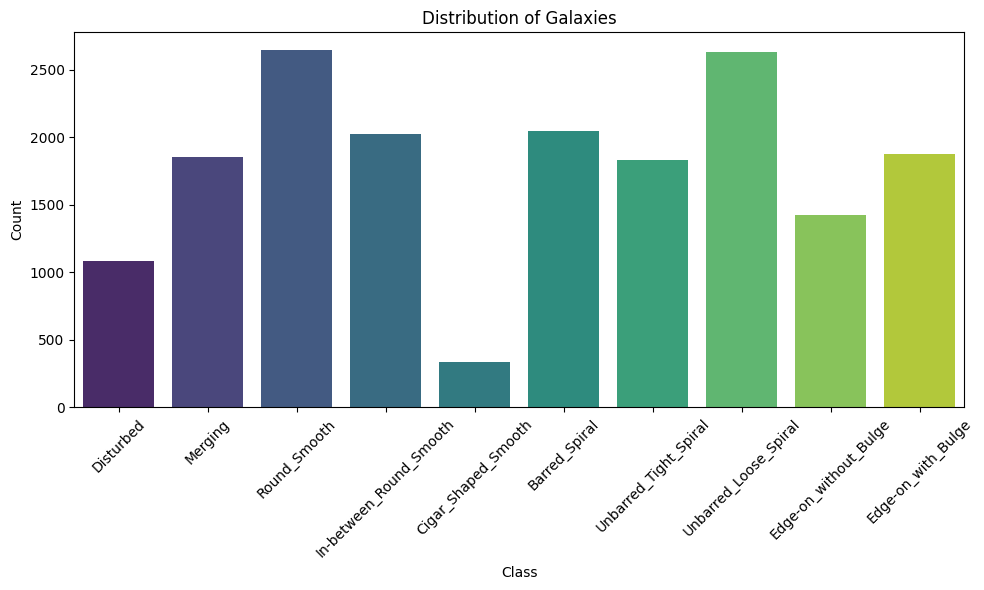

In [21]:
# Create a countplot visualize the distribution of galaxies across classes
plt.figure(figsize=(10, 6))
sns.countplot(x=np.argmax(labels_cat, axis=1), palette='viridis')
plt.title('Distribution of Galaxies')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Define the maximum redshift

max_redshift = 0.05

# Filter the redshift array based on the specified maximum threshold
galaxies_in_range = z[z <= max_redshift]

# Get the number of galaxies below 0.05 redshift
num_galaxies_in_range = len(galaxies_in_range)

print("Number of galaxies below {:.2f} redshift: {}".format(max_redshift, num_galaxies_in_range))

Number of galaxies below 0.05 redshift: 4920


In [23]:
# Filter images and labels based on redshift
filtered_images = images[z <= max_redshift]
filtered_labels = labels_cat[z <= max_redshift]

# Verify the shapes of filtered arrays
print("Shape of filtered images:", filtered_images.shape)
print("Shape of filtered labels:", filtered_labels.shape)

Shape of filtered images: (4920, 256, 256, 3)
Shape of filtered labels: (4920, 10)


In [24]:
# Number of filtered galaxies per class
print('Dataset images per class:', np.sum(filtered_labels, axis=0))

Dataset images per class: [401. 251. 374. 381. 110. 649. 670. 681. 987. 416.]


<ipython-input-25-1c51b2ad1fe5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.argmax(filtered_labels, axis=1), palette='viridis')


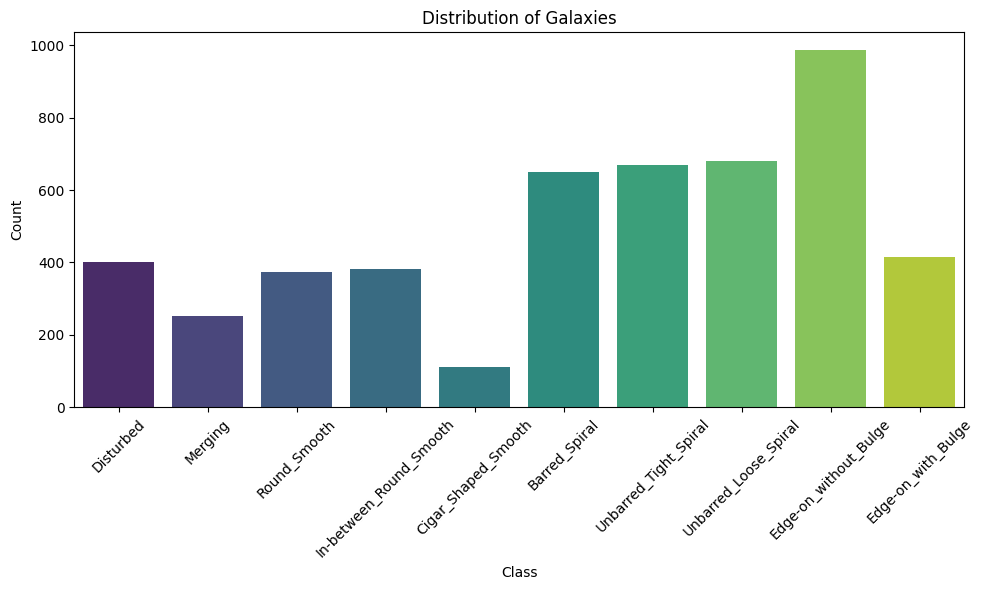

In [25]:
# Create a countplot visualize the distribution of galaxies across classes
plt.figure(figsize=(10, 6))
sns.countplot(x=np.argmax(filtered_labels, axis=1), palette='viridis')
plt.title('Distribution of Galaxies')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.tight_layout()
plt.show()

In [26]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(filtered_images.reshape(-1, 256 * 256 * 3), np.argmax(filtered_labels, axis=1))

# Reshape the resampled images to their original shape
X_resampled = X_resampled.reshape(-1, 256, 256, 3)

# Verify the shape of the resampled dataset
print("Resampled images shape:", X_resampled.shape)
print("Resampled labels shape:", y_resampled.shape)

Resampled images shape: (9870, 256, 256, 3)
Resampled labels shape: (9870,)


In [27]:
# Convert labels into 10 categorical classes
y_resampled_cat = utils.to_categorical(y_resampled, 10)
print('Categorical label:', y_resampled_cat[0])
print('Shape of data structure labels {} and images {}'.format(y_resampled_cat.shape, X_resampled.shape))

Categorical label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of data structure labels (9870, 10) and images (9870, 256, 256, 3)


In [28]:
# Number of filtered galaxies per class
print('Dataset images per class:', np.sum(y_resampled_cat, axis=0))

Dataset images per class: [987. 987. 987. 987. 987. 987. 987. 987. 987. 987.]


<ipython-input-29-d95e2dbfb7bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.argmax(y_resampled_cat, axis=1), palette='viridis')


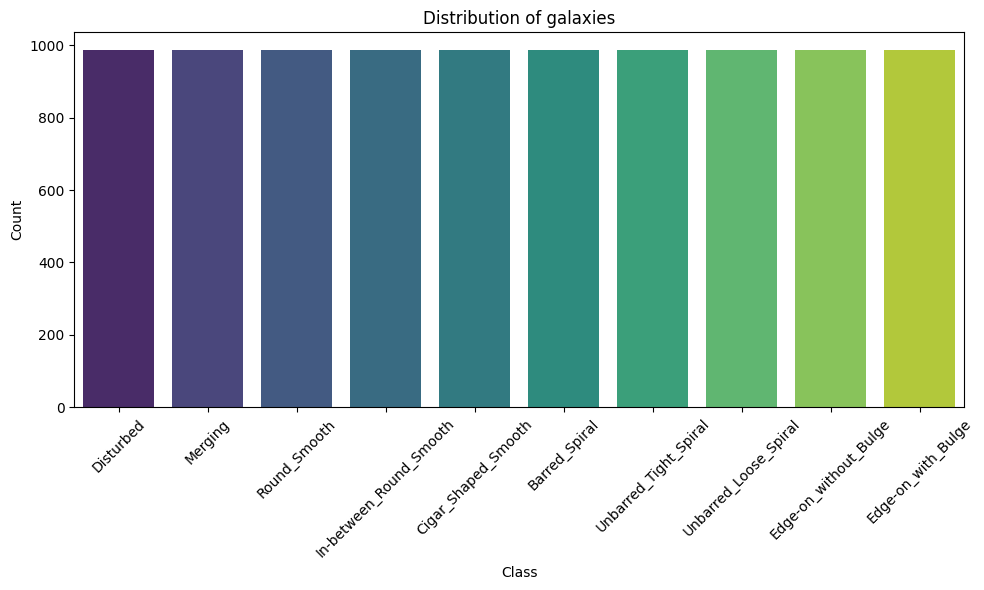

In [29]:
# Create a countplot visualize the distribution of galaxies across classes after fitering by redshift and oversampling
plt.figure(figsize=(10, 6))
sns.countplot(x=np.argmax(y_resampled_cat, axis=1), palette='viridis')
plt.title('Distribution of galaxies')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def plot_galaxies(images, labels, class_names, num_samples=3):
    fig, axs = plt.subplots(len(class_names), num_samples, figsize=(15, 15))
    for i, class_name in enumerate(class_names):
        class_indices = np.where(labels == i)[0]
        selected_indices = np.random.choice(class_indices, num_samples, replace=False)
        for j, idx in enumerate(selected_indices):
            axs[i, j].imshow(images[idx])
            axs[i, j].set_title(f"Class: {class_name}\nIndex: {idx}\nRedshift: {z[idx]}")
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()


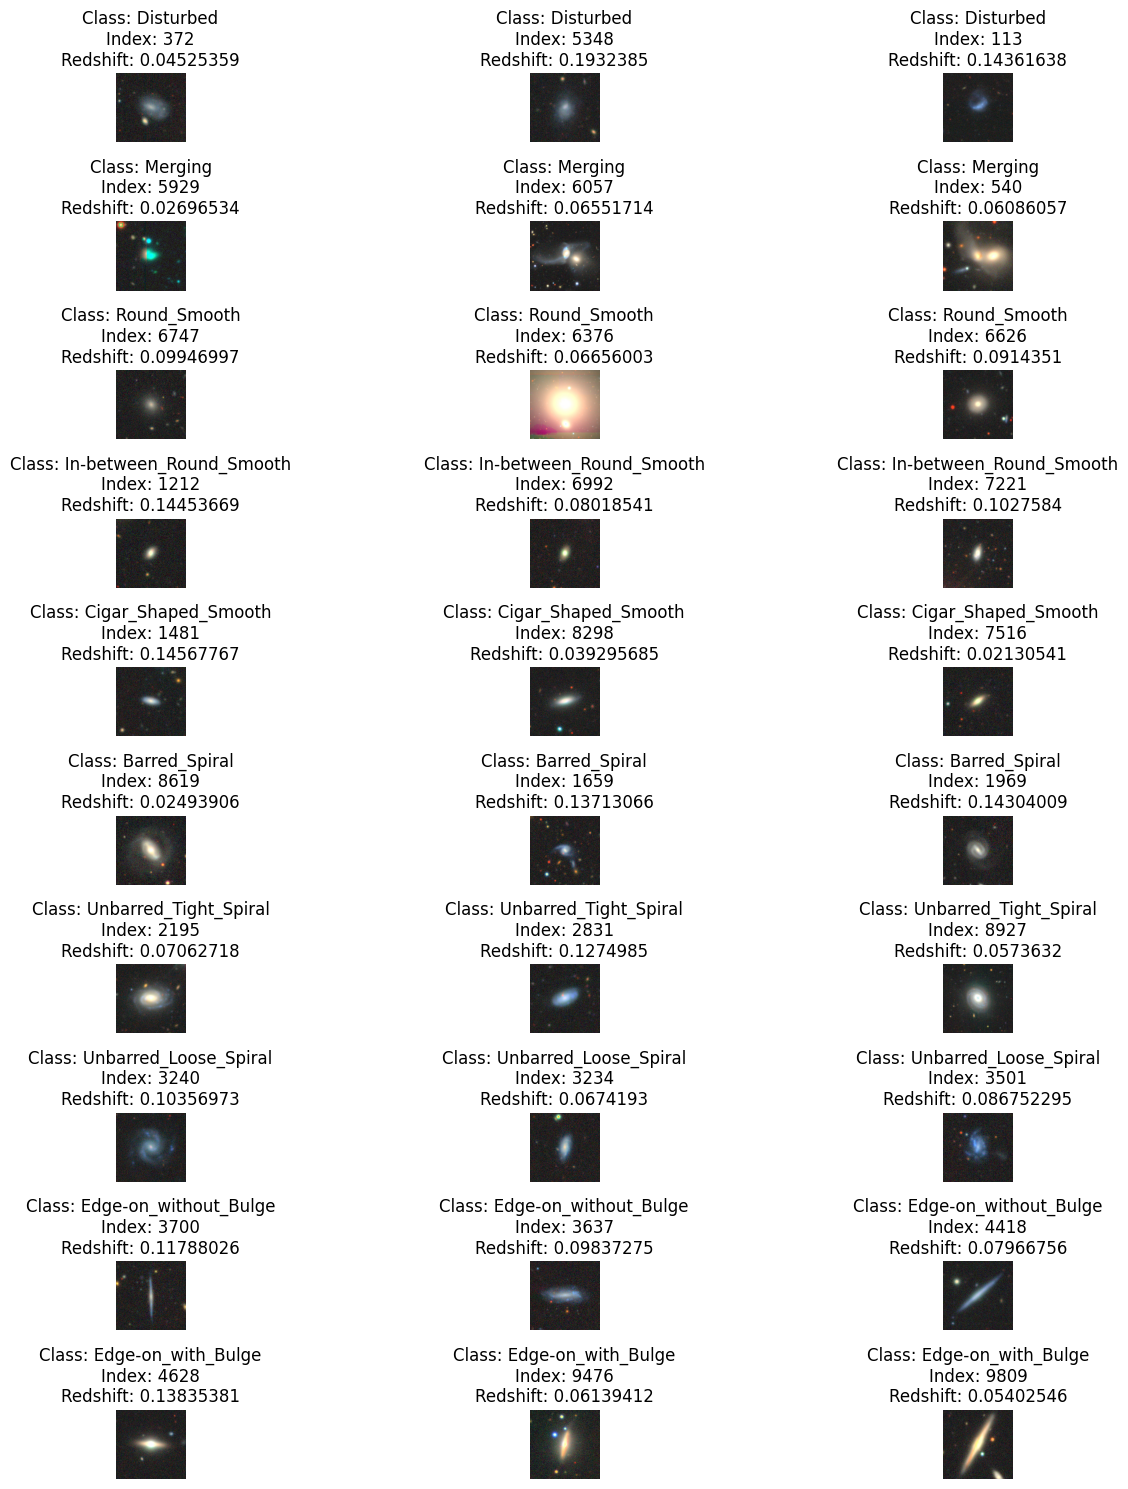

In [ ]:
plot_galaxies(X_resampled, y_resampled, class_names)

In [ ]:
print("Resampled images shape:", X_resampled.shape)
print("Resampled labels shape:", y_resampled_cat.shape)

Resampled images shape: (9870, 256, 256, 3)
Resampled labels shape: (9870, 10)


In [ ]:
print(y_resampled_cat)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


# Data preparation

In [ ]:
print(labels_cat)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
# One hot encoding the labels

print('Categorical label:', y_resampled_cat[0])
print('Shape of data structure labels {} and images {}'.format(y_resampled_cat.shape, X_resampled.shape))

Categorical label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of data structure labels (9870, 10) and images (9870, 256, 256, 3)


**Splitting the resampled dataset into training and testing**

In [ ]:
# Use train_test_split to create 4 variables: X_train, X_test, y_train, y_test
# train and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=101, stratify=y_resampled)

In [ ]:
X_train.shape # 80% of data in training set

(7896, 256, 256, 3)

In [ ]:
X_test.shape

(1974, 256, 256, 3)

In [ ]:
y_train[:5]

array([0, 2, 7, 2, 3])

In [ ]:
class_names[9]

'Edge-on_with_Bulge'

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])

In [ ]:
print("Class names:",class_names)

Class names: ['Disturbed', 'Merging', 'Round_Smooth', 'In-between_Round_Smooth', 'Cigar_Shaped_Smooth', 'Barred_Spiral', 'Unbarred_Tight_Spiral', 'Unbarred_Loose_Spiral', 'Edge-on_without_Bulge', 'Edge-on_with_Bulge']


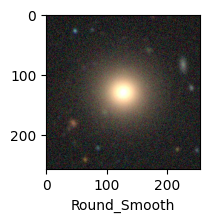

In [ ]:
plot_sample(X_train, y_train, 1)

**Resizing the images to 64 x 64**

In [ ]:
sample_pic = X_train[4]

In [ ]:
sample_pic.shape

(256, 256, 3)

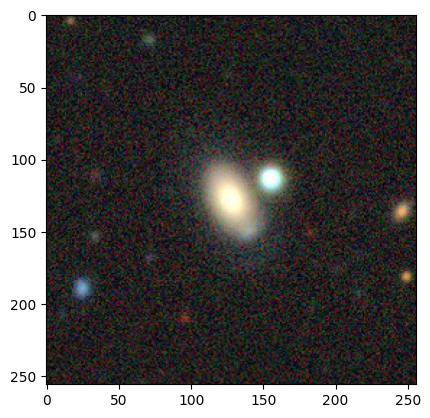

In [ ]:
plt.imshow(sample_pic)

In [ ]:
newimage = cv2.resize(sample_pic,(64, 64))

In [ ]:
newimage.shape

(64, 64, 3)

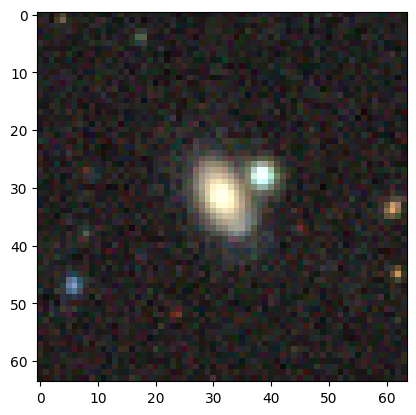

In [ ]:
plt.imshow(newimage)

In [ ]:
X_train.shape[0]

7896

In [ ]:
total_rows = X_train.shape[0]

In [ ]:
arr = []
for i in range(total_rows):
  image = X_train[i]
  image = cv2.resize(image,(64, 64))
  arr.append(image)

In [ ]:
arr[:2]

[array([[[33, 31, 34],
         [27, 37, 41],
         [ 5, 46, 30],
         ...,
         [24, 36, 35],
         [25, 26, 20],
         [24, 28, 32]],
 
        [[26, 39, 35],
         [28, 49, 39],
         [47, 40, 41],
         ...,
         [45, 37, 29],
         [32, 26, 43],
         [31, 24, 22]],
 
        [[42, 36, 54],
         [44, 48, 33],
         [31, 25, 42],
         ...,
         [30, 31, 20],
         [35, 34, 50],
         [28, 35, 27]],
 
        ...,
 
        [[39, 25, 45],
         [28, 40, 45],
         [24, 29, 35],
         ...,
         [47, 57, 51],
         [34, 55, 35],
         [35, 35, 50]],
 
        [[14, 31,  9],
         [26, 16, 38],
         [32, 41, 36],
         ...,
         [39, 41, 38],
         [45, 32, 43],
         [42, 47, 39]],
 
        [[26, 25, 38],
         [24, 27, 22],
         [25, 17, 16],
         ...,
         [33, 36, 37],
         [44, 46, 27],
         [38, 39, 38]]], dtype=uint8),
 array([[[23, 26, 27],
         [43, 27, 3

In [ ]:
type(arr[0])

numpy.ndarray

In [ ]:
# Convert arr list to an array and save this pre-processed list as the new X_train set.

X_train = np.asarray(arr)

In [ ]:
X_train.shape

(7896, 64, 64, 3)

In [ ]:
# Applying the same procedure to test data .
arr = []
for i in range(X_test.shape[0]):
    image = X_test[i]
    image = cv2.resize(image, (64, 64))
    arr.append(image)

In [ ]:
X_test = np.asarray(arr)

**Normalizing data**

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train[:2]

array([[[[0.12941176, 0.12156863, 0.13333333],
         [0.10588235, 0.14509804, 0.16078431],
         [0.01960784, 0.18039216, 0.11764706],
         ...,
         [0.09411765, 0.14117647, 0.1372549 ],
         [0.09803922, 0.10196078, 0.07843137],
         [0.09411765, 0.10980392, 0.1254902 ]],

        [[0.10196078, 0.15294118, 0.1372549 ],
         [0.10980392, 0.19215686, 0.15294118],
         [0.18431373, 0.15686275, 0.16078431],
         ...,
         [0.17647059, 0.14509804, 0.11372549],
         [0.1254902 , 0.10196078, 0.16862745],
         [0.12156863, 0.09411765, 0.08627451]],

        [[0.16470588, 0.14117647, 0.21176471],
         [0.17254902, 0.18823529, 0.12941176],
         [0.12156863, 0.09803922, 0.16470588],
         ...,
         [0.11764706, 0.12156863, 0.07843137],
         [0.1372549 , 0.13333333, 0.19607843],
         [0.10980392, 0.1372549 , 0.10588235]],

        ...,

        [[0.15294118, 0.09803922, 0.17647059],
         [0.10980392, 0.15686275, 0.17647059]

In [ ]:
X_train.shape, X_test.shape

((7896, 64, 64, 3), (1974, 64, 64, 3))

**Splitting the training data into training and validation sets**

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.3)

In [ ]:
print((X_train.shape,y_train.shape))
print((X_val.shape,y_val.shape))
print((X_test.shape,y_test.shape))

((5527, 64, 64, 3), (5527,))
((2369, 64, 64, 3), (2369,))
((1974, 64, 64, 3), (1974,))


**Converting the target variable into categorical data**

In [ ]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
print((X_train.shape,y_train.shape))
print((X_val.shape,y_val.shape))
print((X_test.shape,y_test.shape))

((5527, 64, 64, 3), (5527, 10))
((2369, 64, 64, 3), (2369, 10))
((1974, 64, 64, 3), (1974, 10))


# Data augmentation

In [ ]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
val_generator.fit(X_val)
test_generator.fit(X_test)

In [ ]:
# # Define data augmentation parameters
# train_generator = ImageDataGenerator(
#     rotation_range=20,      # Rotate the image by up to 20 degrees
#     width_shift_range=0.2,  # Shift the image horizontally by up to 20% of the width
#     height_shift_range=0.2, # Shift the image vertically by up to 20% of the height
#     shear_range=0.2,        # Apply shear transformation with intensity up to 20%
#     zoom_range=0.2,         # Zoom into the image by up to 20%
#     horizontal_flip=True,   # Flip the image horizontally
#     vertical_flip=True,     # Flip the image vertically
#     fill_mode='nearest'     # Fill in missing pixels using the nearest pixel value
# )
# val_generator = ImageDataGenerator(
#     rotation_range=20,      # Rotate the image by up to 20 degrees
#     width_shift_range=0.2,  # Shift the image horizontally by up to 20% of the width
#     height_shift_range=0.2, # Shift the image vertically by up to 20% of the height
#     shear_range=0.2,        # Apply shear transformation with intensity up to 20%
#     zoom_range=0.2,         # Zoom into the image by up to 20%
#     horizontal_flip=True,   # Flip the image horizontally
#     vertical_flip=True,     # Flip the image vertically
#     fill_mode='nearest'     # Fill in missing pixels using the nearest pixel value
# )
# test_generator = ImageDataGenerator(
#     rotation_range=20,      # Rotate the image by up to 20 degrees
#     width_shift_range=0.2,  # Shift the image horizontally by up to 20% of the width
#     height_shift_range=0.2, # Shift the image vertically by up to 20% of the height
#     shear_range=0.2,        # Apply shear transformation with intensity up to 20%
#     zoom_range=0.2,         # Zoom into the image by up to 20%
#     horizontal_flip=True,   # Flip the image horizontally
#     vertical_flip=True,     # Flip the image vertically
#     fill_mode='nearest'     # Fill in missing pixels using the nearest pixel value
# )

# #Fitting the augmentation defined above to the data
# train_generator.fit(X_train)
# val_generator.fit(X_val)
# test_generator.fit(X_test)

# Model building and training

### VGG19

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5)

In [ ]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (64,64,3), classes = y_train.shape[1])

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
model= Sequential()
model.add(base_model)
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
Total params: 20024384 (76.39 MB)
Trainable params: 20024384 (76.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax')))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [ ]:
batch_size= 20
epochs=100
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator.flow(X_train, y_train, batch_size= batch_size),
    epochs = epochs,
    steps_per_epoch = len(X_train)//batch_size,
    validation_data = val_generator.flow(X_val, y_val, batch_size = batch_size),
    validation_steps =10, callbacks=[lrr],
    verbose = 1
)

Epoch 1/100


/tmp/ipykernel_1066/431458435.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


276/276 [==============================] - 18s 54ms/step - loss: 0.8524 - accuracy: 0.7136 - val_loss: 0.8142 - val_accuracy: 0.7050 - lr: 0.0010
Epoch 2/100
276/276 [==============================] - 15s 54ms/step - loss: 0.7992 - accuracy: 0.7271 - val_loss: 0.8753 - val_accuracy: 0.6850 - lr: 0.0010
Epoch 3/100
276/276 [==============================] - 15s 55ms/step - loss: 0.7162 - accuracy: 0.7583 - val_loss: 0.6301 - val_accuracy: 0.7850 - lr: 0.0010
Epoch 4/100
276/276 [==============================] - 15s 54ms/step - loss: 0.6940 - accuracy: 0.7752 - val_loss: 0.8631 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 5/100
276/276 [==============================] - 15s 53ms/step - loss: 0.6271 - accuracy: 0.7957 - val_loss: 0.6069 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 6/100
276/276 [==============================] - 15s 53ms/step - loss: 0.6033 - accuracy: 0.8026 - val_loss: 0.7082 - val_accuracy: 0.7550 - lr: 0.0010
Epoch 7/100
276/276 [==============================] - 15s 53ms/

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



276/276 [==============================] - 15s 53ms/step - loss: 0.1594 - accuracy: 0.9513 - val_loss: 0.2695 - val_accuracy: 0.9300 - lr: 1.0000e-05
Epoch 70/100
276/276 [==============================] - 15s 53ms/step - loss: 0.1551 - accuracy: 0.9541 - val_loss: 0.3447 - val_accuracy: 0.8650 - lr: 1.0000e-05
Epoch 71/100
276/276 [==============================] - 15s 53ms/step - loss: 0.1558 - accuracy: 0.9510 - val_loss: 0.4169 - val_accuracy: 0.8800 - lr: 1.0000e-05
Epoch 72/100
276/276 [==============================] - 15s 53ms/step - loss: 0.1479 - accuracy: 0.9557 - val_loss: 0.4669 - val_accuracy: 0.8750 - lr: 1.0000e-05
Epoch 73/100
276/276 [==============================] - 15s 54ms/step - loss: 0.1535 - accuracy: 0.9544 - val_loss: 0.1910 - val_accuracy: 0.9450 - lr: 1.0000e-05
Epoch 74/100
276/276 [==============================] - 15s 54ms/step - loss: 0.1511 - accuracy: 0.9522 - val_loss: 0.5708 - val_accuracy: 0.8400 - lr: 1.0000e-05
Epoch 75/100
276/276 [=============

In [ ]:
model.evaluate(X_test,y_test)

62/62 [==============================] - 3s 35ms/step - loss: 0.4538 - accuracy: 0.8977


[0.4538387060165405, 0.8976697325706482]

**VGG19 model evaluation**

In [ ]:
# Evaluate the model
vgg19_loss, vgg19_acc = model.evaluate(X_test, y_test, verbose=1)
print("Test accuracy of VGG19: {:5.2f}%".format(100 * vgg19_acc))

62/62 [==============================] - 1s 19ms/step - loss: 0.4538 - accuracy: 0.8977
Test accuracy of VGG19: 89.77%


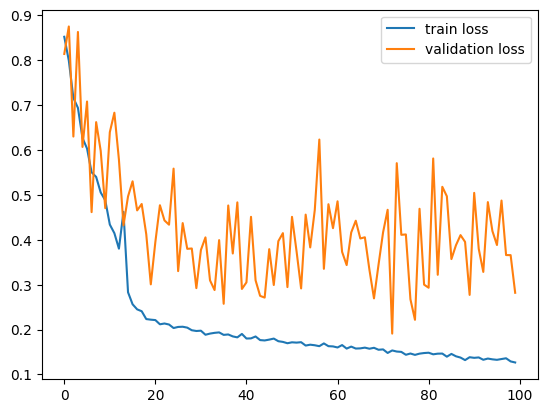

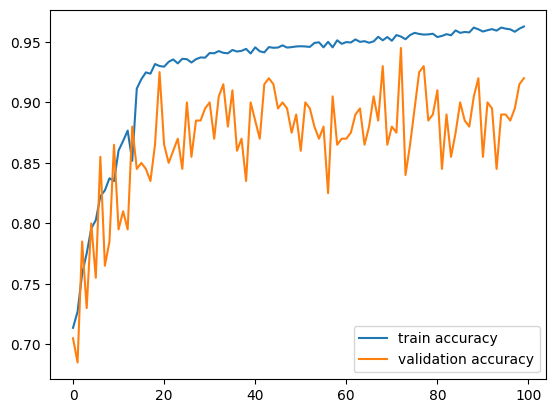

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
classes_x=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

62/62 [==============================] - 1s 17ms/step


In [ ]:
y_pred.shape

(1974, 10)

In [ ]:
classes_x.shape

(1974,)

In [ ]:
y_true.shape

(1974,)

**Testing predictions of VGG19**

In [ ]:
for i in range(20):
    print("Actual:", class_names[y_true[i]])
    print("Prediction:", class_names[classes_x[i]])
    print("-----")
    print()

Actual: Barred_Spiral
Prediction: Unbarred_Loose_Spiral
-----

Actual: Unbarred_Tight_Spiral
Prediction: Unbarred_Tight_Spiral
-----

Actual: Edge-on_with_Bulge
Prediction: Edge-on_with_Bulge
-----

Actual: Merging
Prediction: Merging
-----

Actual: Edge-on_with_Bulge
Prediction: Edge-on_with_Bulge
-----

Actual: Edge-on_with_Bulge
Prediction: Edge-on_with_Bulge
-----

Actual: Unbarred_Loose_Spiral
Prediction: Unbarred_Loose_Spiral
-----

Actual: Barred_Spiral
Prediction: Barred_Spiral
-----

Actual: Unbarred_Loose_Spiral
Prediction: Unbarred_Loose_Spiral
-----

Actual: Edge-on_without_Bulge
Prediction: Edge-on_without_Bulge
-----

Actual: Cigar_Shaped_Smooth
Prediction: Cigar_Shaped_Smooth
-----

Actual: In-between_Round_Smooth
Prediction: In-between_Round_Smooth
-----

Actual: Merging
Prediction: Merging
-----

Actual: In-between_Round_Smooth
Prediction: In-between_Round_Smooth
-----

Actual: Unbarred_Tight_Spiral
Prediction: Unbarred_Tight_Spiral
-----

Actual: Edge-on_with_Bulge
Pr

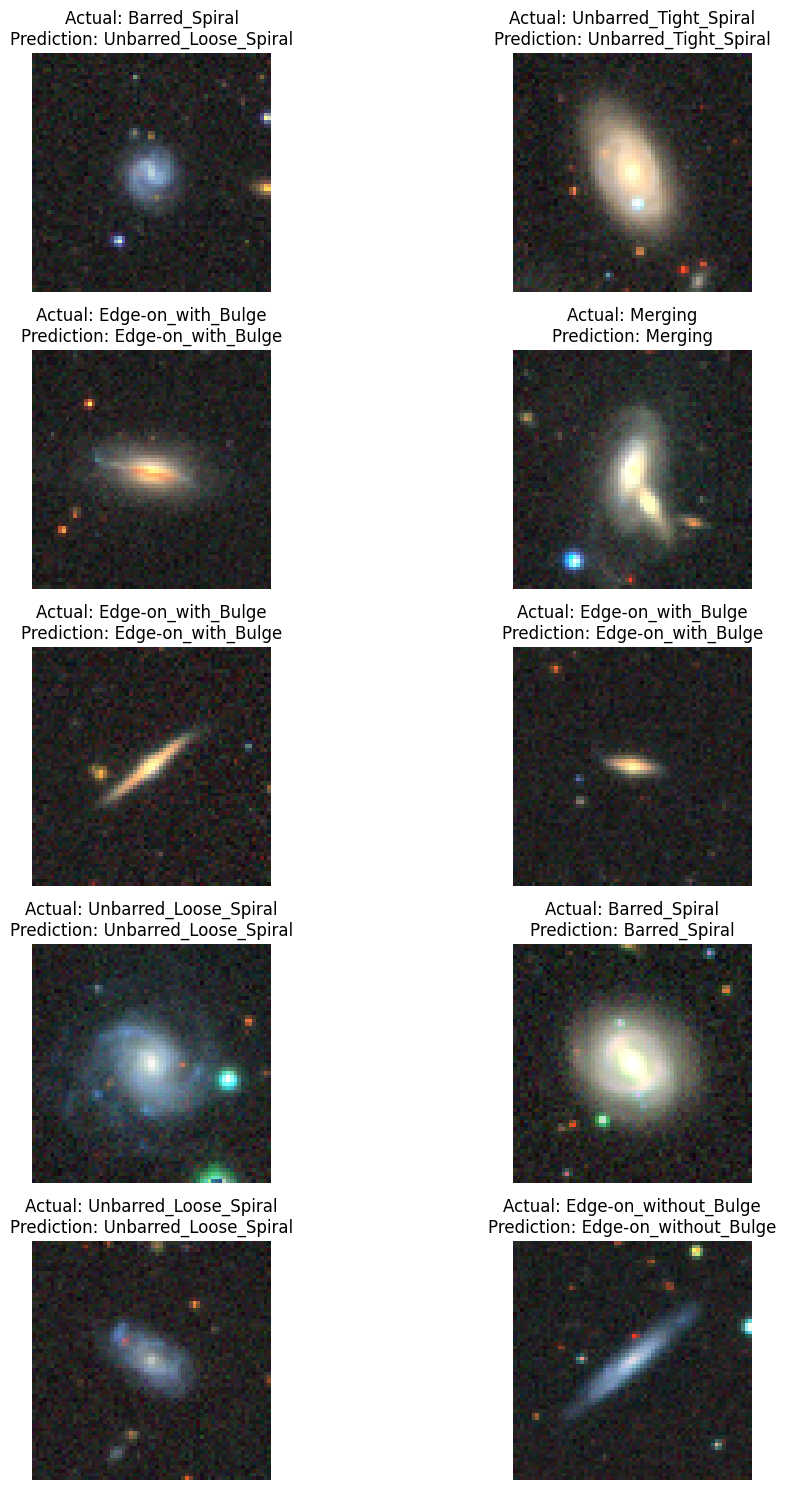

In [ ]:
# Visualizing the results

# Create a grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 15))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Iterate over the first 20 samples
for i in range(10):
    # Plot the image
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Actual: {class_names[y_true[i]]}\nPrediction: {class_names[classes_x[i]]}")
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

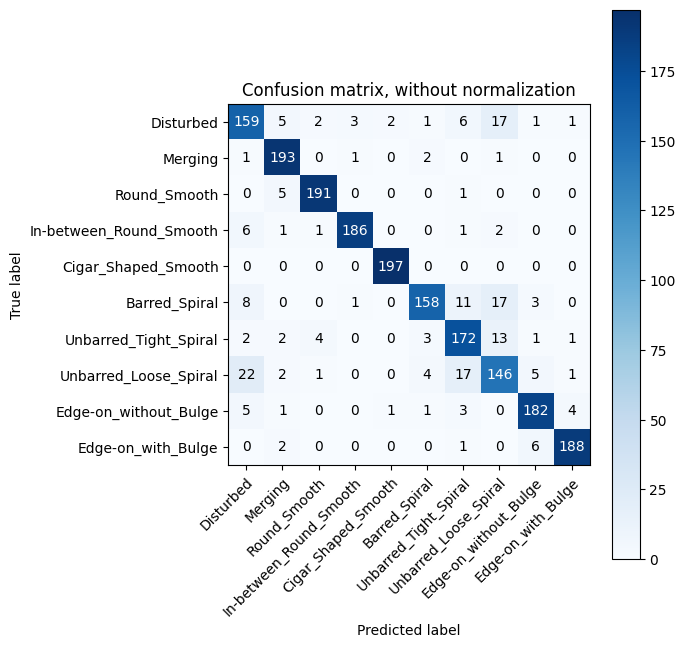

In [ ]:
#Plotting the confusion matrix
confusion_mtx =confusion_matrix(y_true, classes_x)

#Defining the class labels
class_names = ['Disturbed', 'Merging', 'Round_Smooth',
               'In-between_Round_Smooth', 'Cigar_Shaped_Smooth', 'Barred_Spiral',
               'Unbarred_Tight_Spiral', 'Unbarred_Loose_Spiral', 'Edge-on_without_Bulge',
               'Edge-on_with_Bulge']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, classes_x, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:
model.save('VGG19_model_v1.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### ResNet50

In [ ]:
from keras import Sequential, models, layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras import optimizers

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5)

In [ ]:
base_model = ResNet50(include_top = False, weights = 'imagenet', input_shape = (64,64,3), classes = y_train.shape[1])

In [ ]:
model= Sequential()
model.add(base_model)
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 23534592 (89.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
model.add(Dense(1024,activation=('relu'),input_dim=2048))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax')))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_15 (Dense)            (None, 1024)              8389632   
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [ ]:
batch_size= 10
epochs=100
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator.flow(X_train, y_train, batch_size= batch_size),
    epochs = epochs,
    steps_per_epoch = len(X_train)//batch_size,
    validation_data = val_generator.flow(X_val, y_val, batch_size = batch_size),
    validation_steps =10, callbacks=[lrr],
    verbose = 1
)

Epoch 1/100
552/552 [==============================] - 39s 41ms/step - loss: 1.8219 - accuracy: 0.3464 - val_loss: 2.2406 - val_accuracy: 0.2400 - lr: 0.0010
Epoch 2/100
552/552 [==============================] - 22s 39ms/step - loss: 1.3252 - accuracy: 0.5452 - val_loss: 1.3548 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 3/100
552/552 [==============================] - 22s 39ms/step - loss: 1.1194 - accuracy: 0.6262 - val_loss: 1.0723 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/100
552/552 [==============================] - 22s 39ms/step - loss: 0.9626 - accuracy: 0.6832 - val_loss: 1.0185 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 5/100
552/552 [==============================] - 22s 39ms/step - loss: 0.8758 - accuracy: 0.7134 - val_loss: 1.0336 - val_accuracy: 0.6800 - lr: 0.0010
Epoch 6/100
552/552 [==============================] - 22s 39ms/step - loss: 0.7707 - accuracy: 0.7575 - val_loss: 0.7281 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 7/100
552/552 [==============================]

In [ ]:
model.evaluate(X_test,y_test)

62/62 [==============================] - 1s 18ms/step - loss: 0.4678 - accuracy: 0.8850


[0.46777158975601196, 0.8850050568580627]

**ResNet50 model evaluation**

In [ ]:
# Evaluate the model
resnet50_loss, resnet50_acc = model.evaluate(X_test, y_test, verbose=1)
print("Test accuracy of ResNet50: {:5.2f}%".format(100 * resnet50_acc))

62/62 [==============================] - 1s 17ms/step - loss: 0.4678 - accuracy: 0.8850
Test accuracy of ResNet50: 88.50%


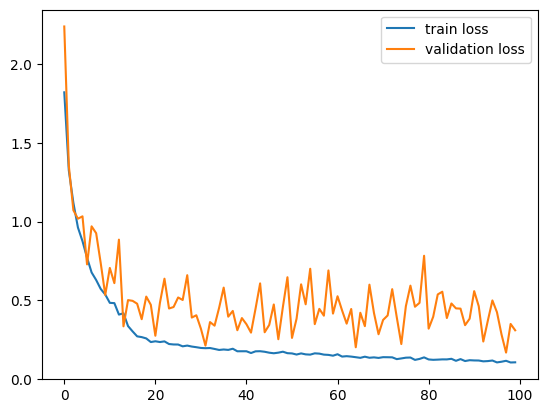

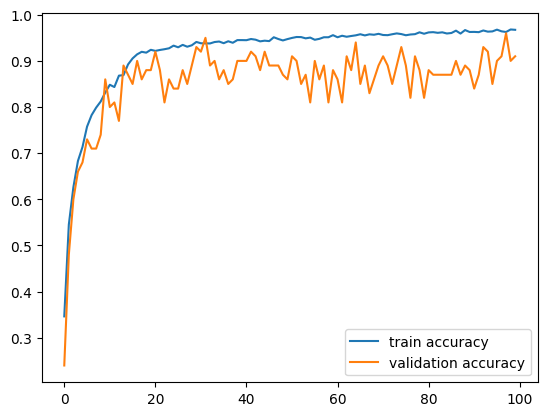

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
classes_x=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

62/62 [==============================] - 2s 15ms/step


In [ ]:
y_pred.shape

(1974, 10)

In [ ]:
classes_x.shape

(1974,)

In [ ]:
y_true.shape

(1974,)

**Testing predictions of ResNet50**

In [ ]:
for i in range(20):
    print("Actual:", class_names[y_true[i]])
    print("Prediction:", class_names[classes_x[i]])
    print("-----")
    print()

Actual: Barred_Spiral
Prediction: Unbarred_Loose_Spiral
-----

Actual: Unbarred_Tight_Spiral
Prediction: Unbarred_Tight_Spiral
-----

Actual: Edge-on_with_Bulge
Prediction: Edge-on_with_Bulge
-----

Actual: Merging
Prediction: Merging
-----

Actual: Edge-on_with_Bulge
Prediction: Edge-on_with_Bulge
-----

Actual: Edge-on_with_Bulge
Prediction: Edge-on_with_Bulge
-----

Actual: Unbarred_Loose_Spiral
Prediction: Unbarred_Loose_Spiral
-----

Actual: Barred_Spiral
Prediction: Barred_Spiral
-----

Actual: Unbarred_Loose_Spiral
Prediction: Unbarred_Loose_Spiral
-----

Actual: Edge-on_without_Bulge
Prediction: Edge-on_without_Bulge
-----

Actual: Cigar_Shaped_Smooth
Prediction: Cigar_Shaped_Smooth
-----

Actual: In-between_Round_Smooth
Prediction: In-between_Round_Smooth
-----

Actual: Merging
Prediction: Merging
-----

Actual: In-between_Round_Smooth
Prediction: In-between_Round_Smooth
-----

Actual: Unbarred_Tight_Spiral
Prediction: Unbarred_Tight_Spiral
-----

Actual: Edge-on_with_Bulge
Pr

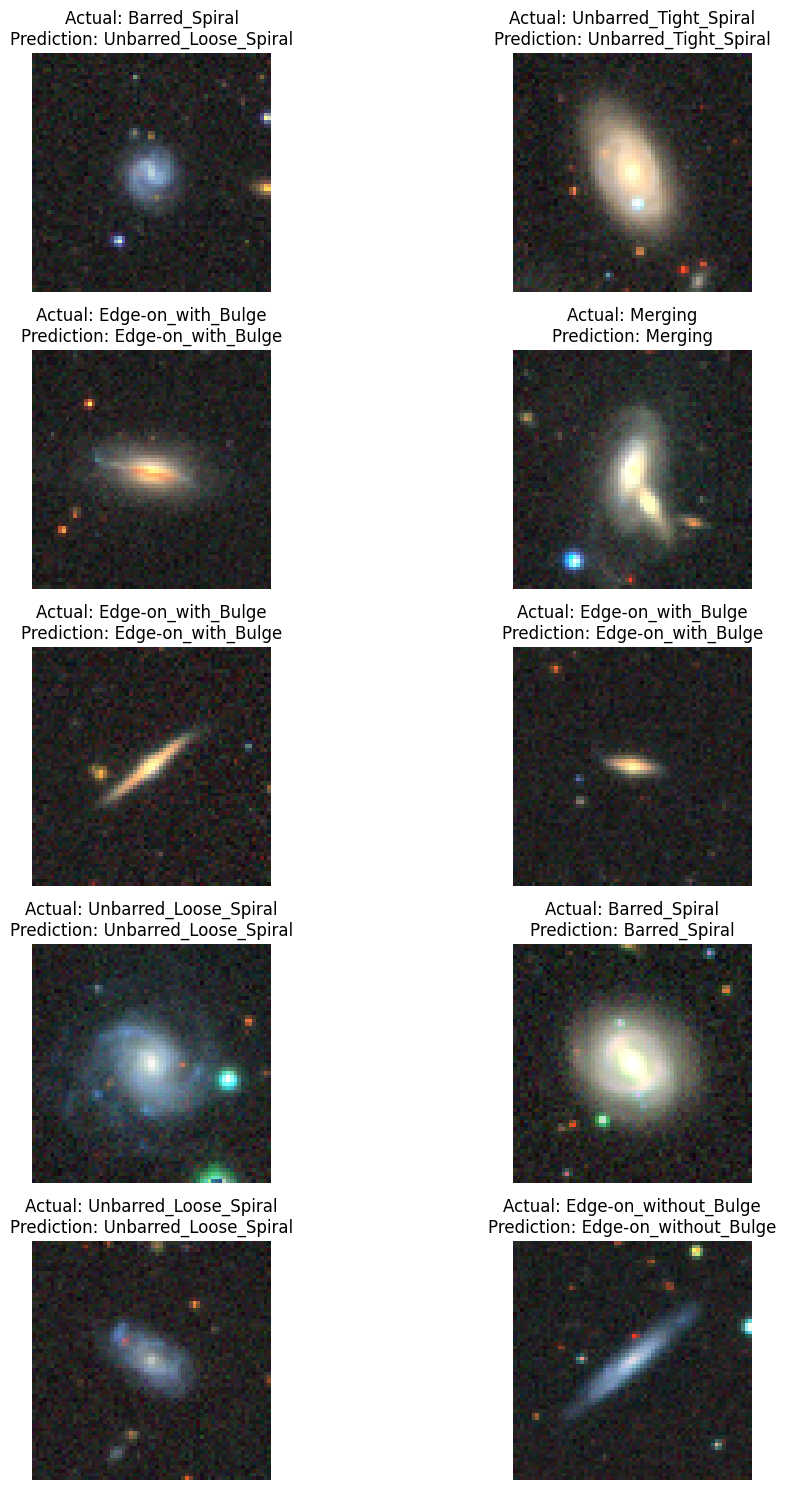

In [ ]:
# Visualizing the results

# Create a grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 15))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Iterate over the first 20 samples
for i in range(10):
    # Plot the image
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Actual: {class_names[y_true[i]]}\nPrediction: {class_names[classes_x[i]]}")
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

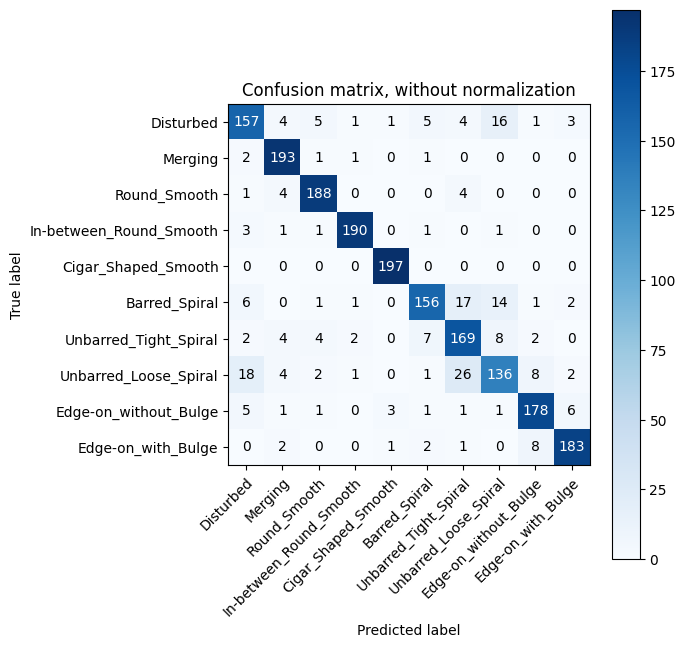

In [ ]:
#Plotting the confusion matrix
confusion_mtx =confusion_matrix(y_true, classes_x)

#Defining the class labels
class_names = ['Disturbed', 'Merging', 'Round_Smooth',
               'In-between_Round_Smooth', 'Cigar_Shaped_Smooth', 'Barred_Spiral',
               'Unbarred_Tight_Spiral', 'Unbarred_Loose_Spiral', 'Edge-on_without_Bulge',
               'Edge-on_with_Bulge']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, classes_x, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:
model.save('ResNet50_model_v1.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
print(tf.__version__)

2.15.0


### EfficientNetB0

In [ ]:
pip install efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 762.4 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5)

In [ ]:
import efficientnet.keras as efn

In [ ]:
base_model =  efn.EfficientNetB0(include_top = False, weights = 'imagenet', input_shape = (64,64,3), classes = y_train.shape[1])

In [ ]:
model= Sequential()
model.add(base_model)
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 2, 2, 1280)        4049564   
 l)                                                              
                                                                 
 flatten_5 (Flatten)         (None, 5120)              0         
                                                                 
Total params: 4049564 (15.45 MB)
Trainable params: 4007548 (15.29 MB)
Non-trainable params: 42016 (164.12 KB)
_________________________________________________________________


In [ ]:
model.add(Dense(1024,activation=('relu'),input_dim=1280))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax')))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 2, 2, 1280)        4049564   
 l)                                                              
                                                                 
 flatten_5 (Flatten)         (None, 5120)              0         
                                                                 
 dense_20 (Dense)            (None, 1024)              5243904   
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
batch_size= 10
epochs=100
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator.flow(X_train, y_train, batch_size= batch_size),
    epochs = epochs,
    steps_per_epoch = len(X_train)//batch_size,
    validation_data = val_generator.flow(X_val, y_val, batch_size = batch_size),
    validation_steps =10, callbacks=[lrr],
    verbose = 1
)

Epoch 1/100


2024-05-04 08:02:05.855610: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/efficientnet-b0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


552/552 [==============================] - 42s 43ms/step - loss: 2.0618 - accuracy: 0.2318 - val_loss: 1.6171 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/100
552/552 [==============================] - 22s 39ms/step - loss: 1.5792 - accuracy: 0.4327 - val_loss: 1.2155 - val_accuracy: 0.6200 - lr: 0.0010
Epoch 3/100
552/552 [==============================] - 22s 40ms/step - loss: 1.3631 - accuracy: 0.5175 - val_loss: 1.0738 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/100
552/552 [==============================] - 22s 40ms/step - loss: 1.2445 - accuracy: 0.5643 - val_loss: 0.9690 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 5/100
552/552 [==============================] - 22s 40ms/step - loss: 1.1523 - accuracy: 0.5992 - val_loss: 0.9043 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 6/100
552/552 [==============================] - 22s 40ms/step - loss: 1.0346 - accuracy: 0.6395 - val_loss: 0.9725 - val_accuracy: 0.6700 - lr: 0.0010
Epoch 7/100
552/552 [==============================] - 22s 40ms/

In [ ]:
model.evaluate(X_test,y_test)

62/62 [==============================] - 1s 12ms/step - loss: 0.5662 - accuracy: 0.8151


[0.5661936402320862, 0.8150962591171265]

**EfficientNetB0 model evaluation**

In [ ]:
# Evaluate the model
efficientNetB0_loss, efficientNetB0_acc = model.evaluate(X_test, y_test, verbose=1)
print("Test accuracy of EfficientNetB0: {:5.2f}%".format(100 * efficientNetB0_acc))

62/62 [==============================] - 1s 12ms/step - loss: 0.5662 - accuracy: 0.8151
Test accuracy of EfficientNetB0: 81.51%


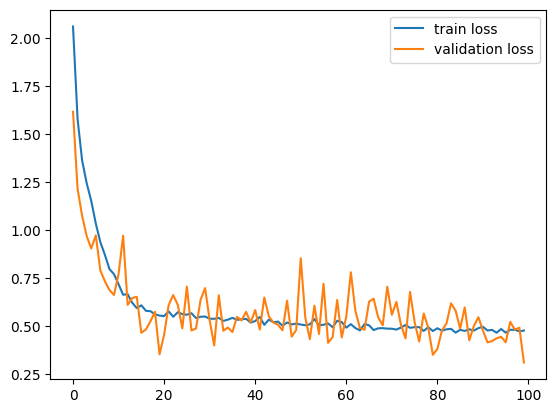

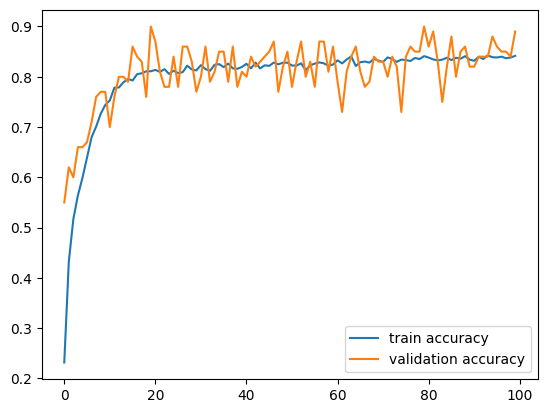

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
classes_x=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

62/62 [==============================] - 2s 11ms/step


**Tetsting predictions of EfficientNetB0**

In [ ]:
for i in range(20):
    print("Actual:", class_names[y_true[i]])
    print("Prediction:", class_names[classes_x[i]])
    print("-----")
    print()

Actual: Barred_Spiral
Prediction: Unbarred_Tight_Spiral
-----

Actual: Unbarred_Tight_Spiral
Prediction: Unbarred_Loose_Spiral
-----

Actual: Edge-on_with_Bulge
Prediction: Edge-on_with_Bulge
-----

Actual: Merging
Prediction: Merging
-----

Actual: Edge-on_with_Bulge
Prediction: Edge-on_with_Bulge
-----

Actual: Edge-on_with_Bulge
Prediction: Edge-on_with_Bulge
-----

Actual: Unbarred_Loose_Spiral
Prediction: Unbarred_Loose_Spiral
-----

Actual: Barred_Spiral
Prediction: Barred_Spiral
-----

Actual: Unbarred_Loose_Spiral
Prediction: Unbarred_Loose_Spiral
-----

Actual: Edge-on_without_Bulge
Prediction: Edge-on_without_Bulge
-----

Actual: Cigar_Shaped_Smooth
Prediction: Cigar_Shaped_Smooth
-----

Actual: In-between_Round_Smooth
Prediction: In-between_Round_Smooth
-----

Actual: Merging
Prediction: Merging
-----

Actual: In-between_Round_Smooth
Prediction: In-between_Round_Smooth
-----

Actual: Unbarred_Tight_Spiral
Prediction: Unbarred_Tight_Spiral
-----

Actual: Edge-on_with_Bulge
Pr

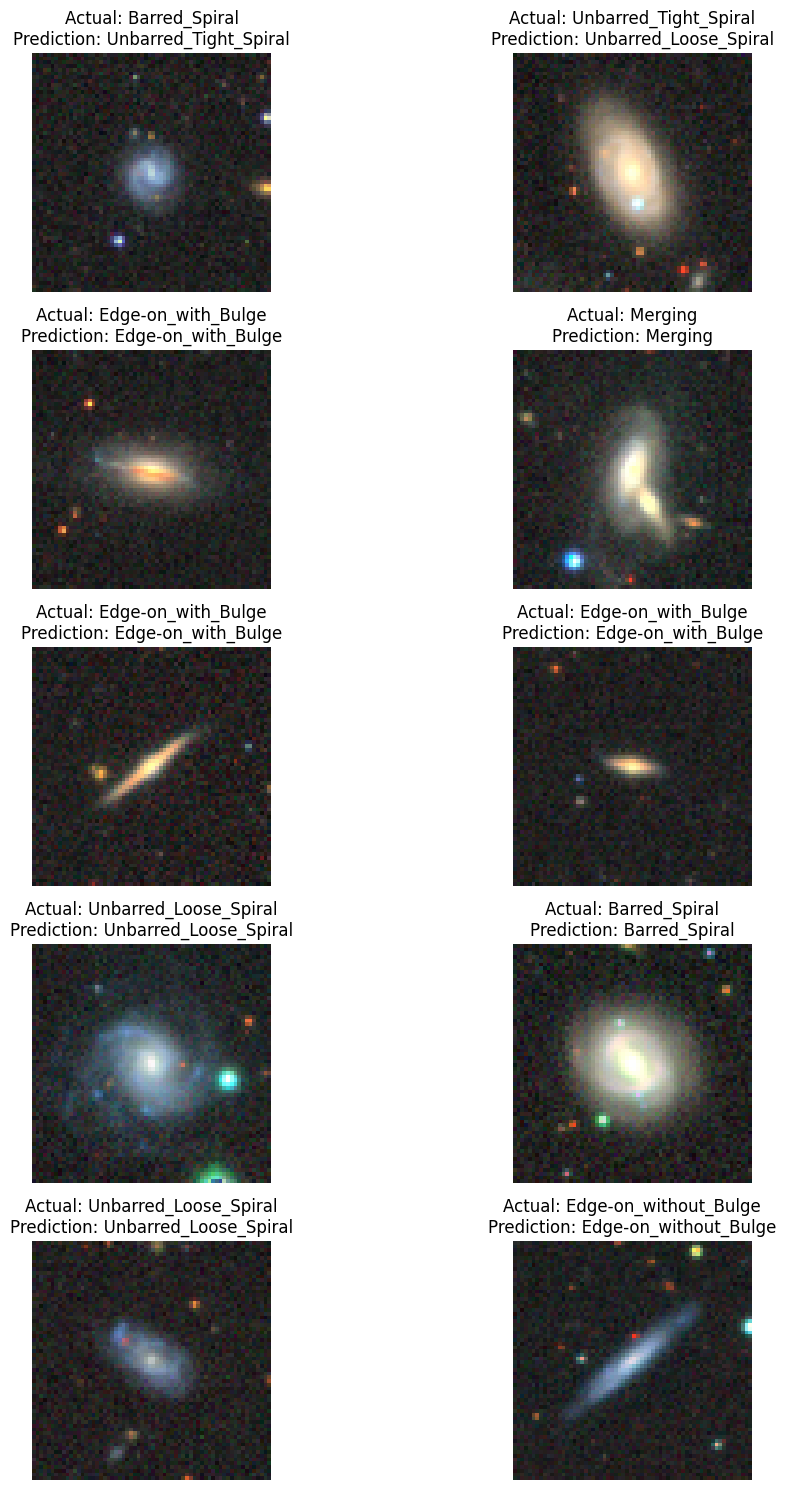

In [ ]:
# Visualizing the results

# Create a grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 15))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Iterate over the first 20 samples
for i in range(10):
    # Plot the image
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Actual: {class_names[y_true[i]]}\nPrediction: {class_names[classes_x[i]]}")
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

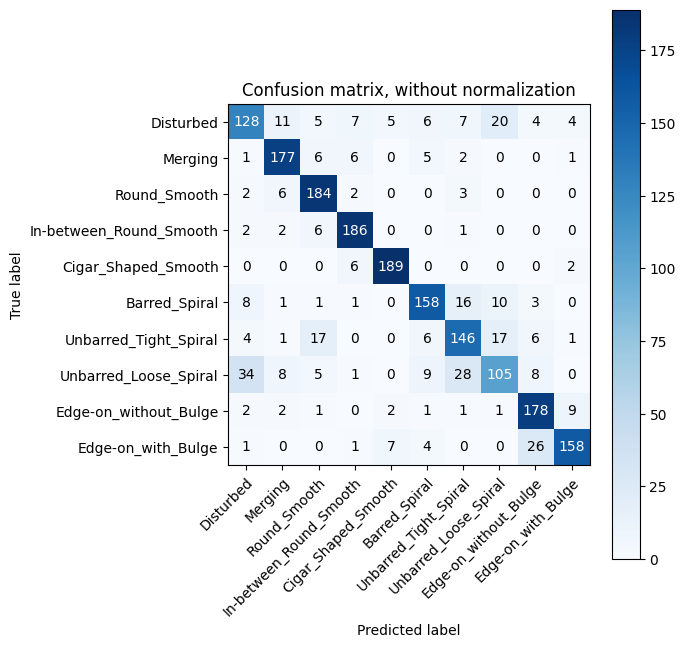

In [ ]:
#Plotting the confusion matrix
confusion_mtx =confusion_matrix(y_true, classes_x)

#Defining the class labels
class_names = ['Disturbed', 'Merging', 'Round_Smooth',
               'In-between_Round_Smooth', 'Cigar_Shaped_Smooth', 'Barred_Spiral',
               'Unbarred_Tight_Spiral', 'Unbarred_Loose_Spiral', 'Edge-on_without_Bulge',
               'Edge-on_with_Bulge']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, classes_x, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:
model.save('EfficientNetB0_model_v2.h5')

# Model comparison

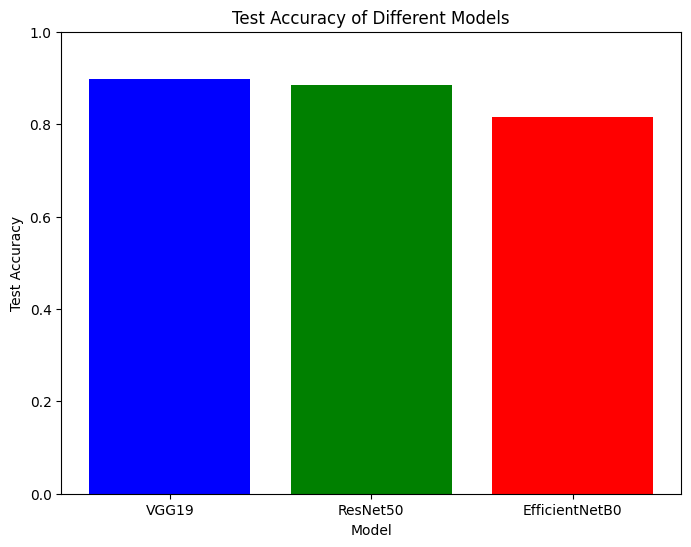

In [ ]:
import matplotlib.pyplot as plt

# Test accuracies of the three models
test_accuracies = [vgg19_acc, resnet50_acc, efficientNetB0_acc]

# Model names
model_names = ['VGG19', 'ResNet50', 'EfficientNetB0']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, test_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy percentage
plt.show()